In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/SRKads1998/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

NY Spills Data is a dataset that contains information on hazardous material spills within New York State. The information shared includes material spilled, location, time and quanitity of the spill, water bodies impacted and the closed (aka clean-up) date. 
Dataset was created on October 19, 2015, and last updated November 8 2025, which is the date of access. 

US counties data is a dataset from the US Census's Topologically Integrated Geographic Encoding and Reference Sytem, or TIGER, that contains shapefile data for US Counties and their borders. 

## 3. Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# use os.path.join function to stage files within filepath and then import them in directly to the variable names
fp = os.path.join('data', 'spills', 'Spill_Incidents_20251108.csv')
spills = pd.read_csv(fp)


fp = os.path.join('data', 'tl_2022_us_county', 'tl_2022_us_county.shp')
counties = gpd.read_file(fp)
spills.head(3)
counties.head(3)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."


In [4]:
print(spills.head(3))

   Spill Number Program Facility Name            Street 1 Street 2  Locality  \
0        107132                MH 864  RT 119/MILLWOOD RD      NaN  ELMSFORD   
1        405586             BOWRY BAY  WATER POLL CONTROL      NaN    QUEENS   
2        405586             BOWRY BAY  WATER POLL CONTROL      NaN    QUEENS   

        County ZIP Code  SWIS Code  DEC Region  Spill Date Received Date  \
0  Westchester      NaN       6000           3  10/10/2001    10/10/2001   
1       Queens      NaN       4101           2  08/21/2004    08/21/2004   
2       Queens      NaN       4101           2  08/21/2004    08/21/2004   

  Contributing Factor   Waterbody   Source  Close Date     Material Name  \
0             Unknown         NaN  Unknown  10/15/2001  unknown material   
1               Other  EAST RIVER  Unknown  09/17/2004        raw sewage   
2               Other  EAST RIVER  Unknown  09/17/2004        raw sewage   

  Material Family Quantity    Units Recovered  
0           Other    

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [5]:
#a. Check the dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


In [6]:
#b. Check the data types of the columns
spills.dtypes

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [7]:
#c. Check the unique values in the `material_family` column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
#d. Check the unique values in the `county` column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

e. Type your answer here, replacing this text.

Some of the things we learned from this initial data exploration are that most of the series within the spills df are objects, the column names are capitalized some of which have spaces, and that while all the New York counties are listed, there are also some ares which are Indian Reservations, and regions from neighboring states. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [9]:
#change column names to lower case spelling
spills.columns = spills.columns.str.lower()

#swap space between column names for underscore
spills.columns = spills.columns.str.replace(' ', '_')

spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [12]:
# change object columns Spill Number, Zip Code, Recovered and Quantity to int

# test conversion on 'spill_number'
spills['spill_number'] = pd.to_numeric(spills['spill_number'], errors ='coerce')
spills['spill_number'].dtypes

# apply to other columns 
spills['zip_code'] = pd.to_numeric(spills['zip_code'], errors = 'coerce')
spills['quantity'] = pd.to_numeric(spills['quantity'], errors = 'coerce')
spills['recovered'] = pd.to_numeric(spills['recovered'], errors = 'coerce')
spills.dtypes

spill_number               int64
program_facility_name     object
street_1                  object
street_2                  object
locality                  object
county                    object
zip_code                 float64
swis_code                  int64
dec_region                 int64
spill_date                object
received_date             object
contributing_factor       object
waterbody                 object
source                    object
close_date                object
material_name             object
material_family           object
quantity                 float64
units                     object
recovered                float64
dtype: object

In [13]:
# change spill date, recievied date, close date columns to datetime
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
spills['received_date'] = pd.to_datetime(spills['received_date'])
spills['close_date'] = pd.to_datetime(spills['close_date'])
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                        float64
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [14]:
# include values in 'material_family' with 'Petroleum' and select within the provided date range
petr_23 = spills[(spills['material_family'] == 'Petroleum') &
                (spills['spill_date'] >= '2023-01-01') &
                (spills['spill_date'] <= '2023-10-31')]

In [15]:
petr_23.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,0.0,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,diesel,Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,0.0,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,#2 fuel oil,Petroleum,0.0,Gallons,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,0.0,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,gasoline,Petroleum,0.0,NaN,0.0
224,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,0.0,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,kerosene [#1 fuel oil] (on-site consumption),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,0.0,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [16]:
# since we converted spill_date, we can utilize the above provided script for the print statement
print(f"petr_23 year: {petr_23.spill_date.dt.year.unique()}")
# replicate print statment from above, change to month, and add sort_values() function to place months in order
print(f"petr_23 month: {petr_23.spill_date.dt.month.sort_values().unique()} ")

petr_23 year: [2023]
petr_23 month: [ 1  2  3  4  5  6  7  8  9 10] 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [17]:
# set-up assert test
assert (petr_23['material_family'] == 'Petroleum').all()


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [18]:
spills_per_county = petr_23.groupby('county').size().reset_index(name= 'n_spills')
spills_per_county 

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,744
62,Wyoming,24


In [19]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

_Type your answer here, replacing this text._

We learned that the geo-dataframe currently has mostly 'object' datatypes for each of the columns within it. It uses the NAD 83 CRS and, when plotted, is projecting US counties in a way that it appears to show the US Map, with appropriate lat/longs

In [20]:
# a
counties.head(3)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."


In [21]:
# b
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [22]:
# c
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

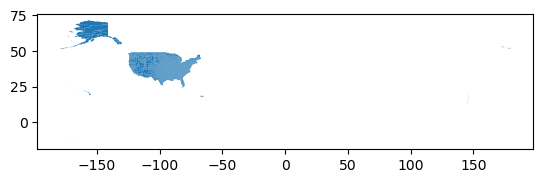

In [23]:
# d
counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [24]:
#change column names to lower case spelling
counties.columns = counties.columns.str.lower()
counties['statefp']

0       31
1       53
2       35
3       31
4       31
        ..
3230    13
3231    27
3232    28
3233    48
3234    54
Name: statefp, Length: 3235, dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

In [25]:
# filter to only include rows with statefp value of '36', since that's NY's code
ny_counties = counties[counties['statefp'] == '36']
ny_counties

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,051,00974124,36051,Livingston,Livingston County,06,H1,G4020,None,None,None,A,1636254770,22005357,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580..."
2963,36,025,00974111,36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067..."
3157,36,071,00974134,36071,Orange,Orange County,06,H1,G4020,None,None,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603..."
3158,36,093,00974144,36093,Schenectady,Schenectady County,06,H1,G4020,None,None,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763..."


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [26]:
# use unique function to see all the individual county names
ny_counties['name'].unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [27]:
# use unique function on spills_per_county
spills_per_county['county'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [28]:
# use nmpy function, setdiff1d() from above and use tolist function to set as a string

diff_names_spills = np.setdiff1d(spills_per_county['county'], ny_counties['name']).tolist()
diff_names_spills


['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [29]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [30]:
# use nmpy function, setdiff1d() from above and use tolist function to set as a string
diff_names_ny = np.setdiff1d(ny_counties['name'], spills_per_county['county']).tolist()
diff_names_ny

['St. Lawrence']

In [31]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


There is 1 spill in Tuscarora Indian Reservation

In [32]:
# e. 
# use .loc to find the number of spills in that Indian Reservation
spills_per_county.loc[spills_per_county['county'] == 'Tuscarora Indian Reservation', 'n_spills']

56    1
Name: n_spills, dtype: int64

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [33]:
# use replace function to swap out the new name of the county
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

In [34]:
spills_per_county.tail(15)

,county,n_spills
49,Seneca,25
50,St. Lawrence,65
51,Steuben,72
52,Suffolk,723
53,Sullivan,85
54,Tioga,28
55,Tompkins,36
56,Tuscarora Indian Reservation,1
57,Ulster,162
58,Warren,81


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [35]:
# use .rename function to change the 'name' column name to 'county'
ny_counties = ny_counties.rename(columns = {'name': 'county'})
ny_counties

,statefp,countyfp,countyns,geoid,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,051,00974124,36051,Livingston,Livingston County,06,H1,G4020,None,None,None,A,1636254770,22005357,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580..."
2963,36,025,00974111,36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067..."
3157,36,071,00974134,36071,Orange,Orange County,06,H1,G4020,None,None,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603..."
3158,36,093,00974144,36093,Schenectady,Schenectady County,06,H1,G4020,None,None,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763..."


b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [36]:
# join spills_per_county to ny_counties
ny_counties = pd.merge(ny_counties,
                      spills_per_county,
                      how = 'inner',
                      on = 'county')
ny_counties

,statefp,countyfp,countyns,geoid,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",162
2,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,36,051,00974124,36051,Livingston,Livingston County,06,H1,G4020,None,None,None,A,1636254770,22005357,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580...",59
58,36,025,00974111,36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067...",41
59,36,071,00974134,36071,Orange,Orange County,06,H1,G4020,None,None,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603...",336
60,36,093,00974144,36093,Schenectady,Schenectady County,06,H1,G4020,None,None,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763...",78



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [40]:
# add 1 spill manually to 'n_spills' for Niagra county
ny_counties.loc[ny_counties['county'] == 'Niagara County', 'n_spills'] =+1

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



Text(0.05, 0.05, 'Data Source: New york State Department of Environmental Conservation *accessed Nov 8 2025*')

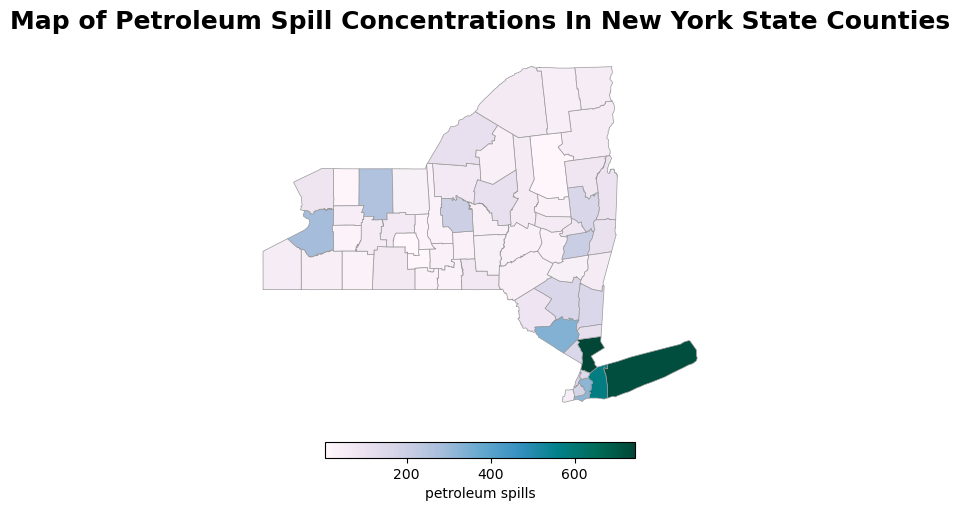

In [47]:
# Create a map 

# create a figure and ax
fig, ax = plt.subplots(figsize = (8, 6))

# create the choropleth map
ny_counties.plot(
        ax = ax,
        column = 'n_spills',
        cmap = 'PuBuGn',
        legend = True,
        edgecolor = '0.6',
        linewidth = 0.5, 
        legend_kwds = {
            "shrink": 0.5,
            "label": "petroleum spills",
            "orientation": "horizontal",
            "pad": 0.05
        }
)
# add a title
ax.set_title('Map of Petroleum Spill Concentrations In New York State Counties', 
            fontsize = 18, weight = 'bold', pad = 15)

# remove axis
ax.axis('off')

# add annotation
ax.annotate('Data Source: New york State Department of Environmental Conservation *accessed Nov 8 2025*',
           xy = (0.05, 0.05),xycoords = fontsize = 4, color = 'black')


b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

*Your answer here.*

## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [ ]:
grader.check_all()